In [1]:
import re
import spacy
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from transformers import pipeline, AutoTokenizer

In [2]:
df_amazon = pd.read_csv('amazon.csv')
df_amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
df_amazon['category'] = df_amazon['category'].str.split('|').str[0]

In [4]:
df_amazon['category'].head()

0    Computers&Accessories
1    Computers&Accessories
2    Computers&Accessories
3    Computers&Accessories
4    Computers&Accessories
Name: category, dtype: object

In [5]:
df_amazon[['Company Name', 'Product Name']] = df_amazon['product_name'].str.extract(r'^(\S+)\s+(.*)')
df_amazon.drop(columns=['product_name'], inplace=True)

In [6]:
df_amazon.head()

,product_id,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Company Name,Product Name
0,B07JW9H4J1,Computers&Accessories,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Wayona,Nylon Braided USB to Lightning Fast Charging a...
1,B098NS6PVG,Computers&Accessories,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Ambrane,Unbreakable 60W / 3A Fast Charging 1.5m Braide...
2,B096MSW6CT,Computers&Accessories,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Sounce,Fast Phone Charging Cable & Data Sync USB Cabl...
3,B08HDJ86NZ,Computers&Accessories,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,boAt,Deuce USB 300 2 in 1 Type-C & Micro USB Stress...
4,B08CF3B7N1,Computers&Accessories,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Portronics,Konnect L 1.2M Fast Charging 3A 8 Pin USB Cabl...


In [7]:
df_amazon.isnull().sum()

product_id             0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
Company Name           0
Product Name           0
dtype: int64

-------------
1. What is the average rating for each product category?

In [8]:
category_count = df_amazon['category'].value_counts()
category_count

category
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [9]:
df_amazon['rating'] = pd.to_numeric(df_amazon['rating'], errors='coerce')
df_amazon['rating'] = df_amazon['rating'].astype(float)
average_rating_per_category = df_amazon.groupby('category')['rating'].mean()

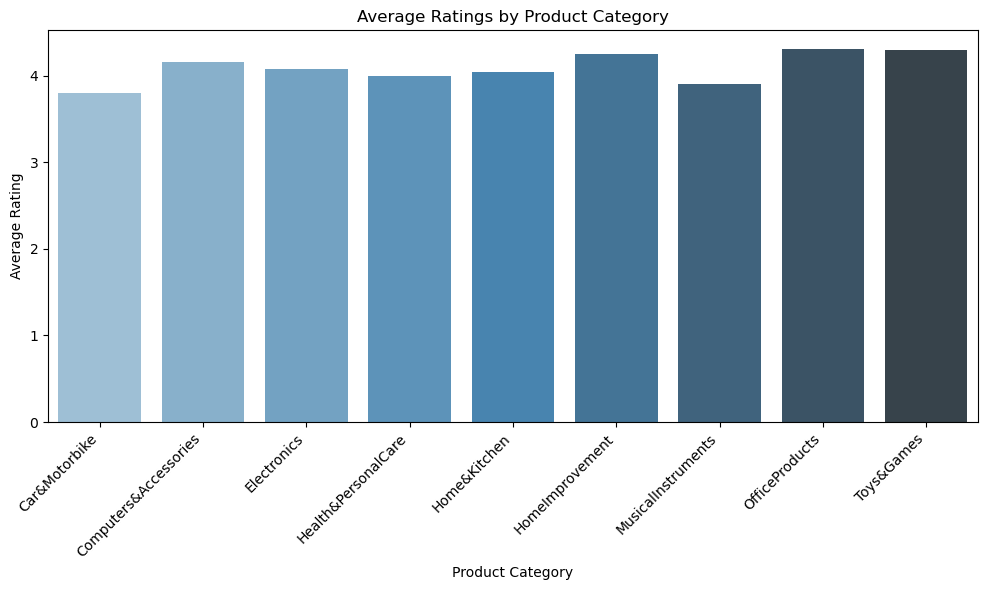

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_per_category.index, y=average_rating_per_category.values, palette="Blues_d")
plt.title('Average Ratings by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

----------
2. What are the top rating_count products by category?

In [11]:
df_amazon['rating_count'] = df_amazon['rating_count'].astype(str).str.extract('(\d+)').astype(float)
top_rating_count = df_amazon.groupby('category')['rating_count'].mean().sort_values(ascending=False)

In [12]:
print(top_rating_count) # top_rating_count

category
Home&Kitchen             108.850446
Computers&Accessories     86.266075
Electronics               78.190114
MusicalInstruments        44.000000
OfficeProducts            30.354839
Toys&Games                15.000000
HomeImprovement            3.500000
Health&PersonalCare        3.000000
Car&Motorbike              1.000000
Name: rating_count, dtype: float64


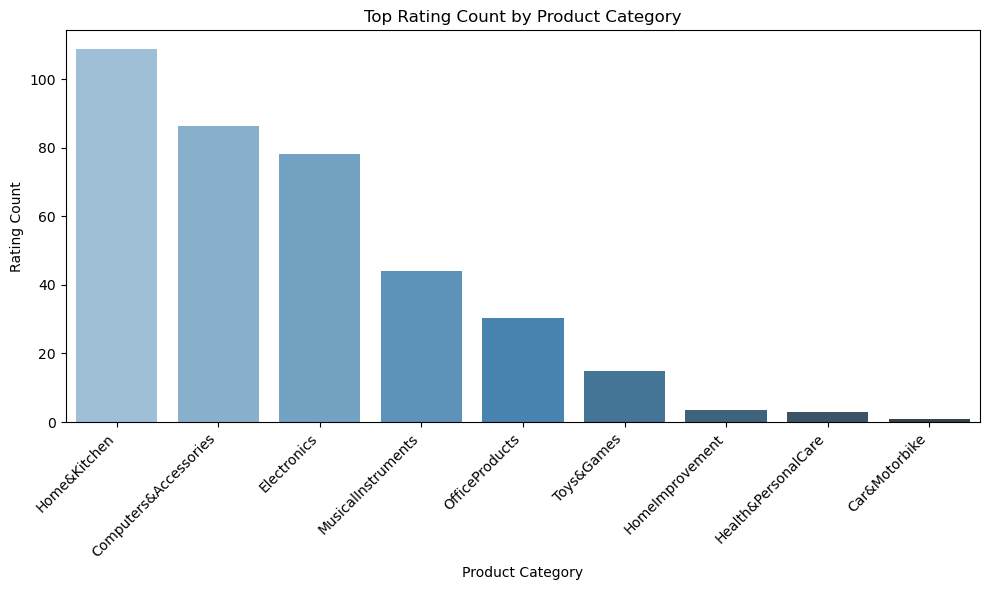

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rating_count.index, y=top_rating_count.values, palette="Blues_d")
plt.title('Top Rating Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Rating Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

------------
3. What is the distribution of discounted prices vs. actual prices?

In [14]:
distribution = df_amazon[['discounted_price','actual_price']].replace('[^\d.]', '', regex=True).astype(float)
distribution

,discounted_price,actual_price
0,399.0,1099.0
1,199.0,349.0
2,199.0,1899.0
3,329.0,699.0
4,154.0,399.0
...,...,...
1460,379.0,919.0
1461,2280.0,3045.0
1462,2219.0,3080.0
1463,1399.0,1890.0


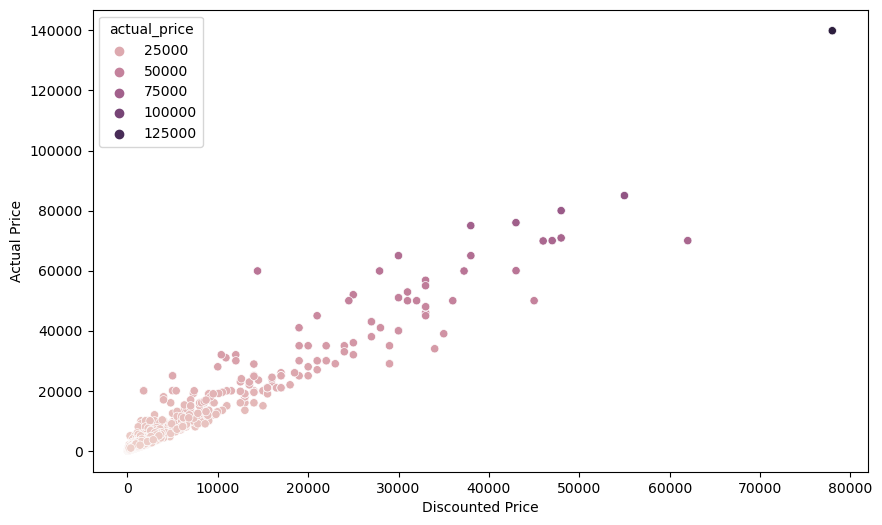

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='actual_price', data=distribution, hue='actual_price')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.show()

---------------
4. How does the average discount percentage vary across categories?

In [16]:
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].astype(str).str.extract('(\d+)').astype(float)
avg_discount_percentage = df_amazon.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

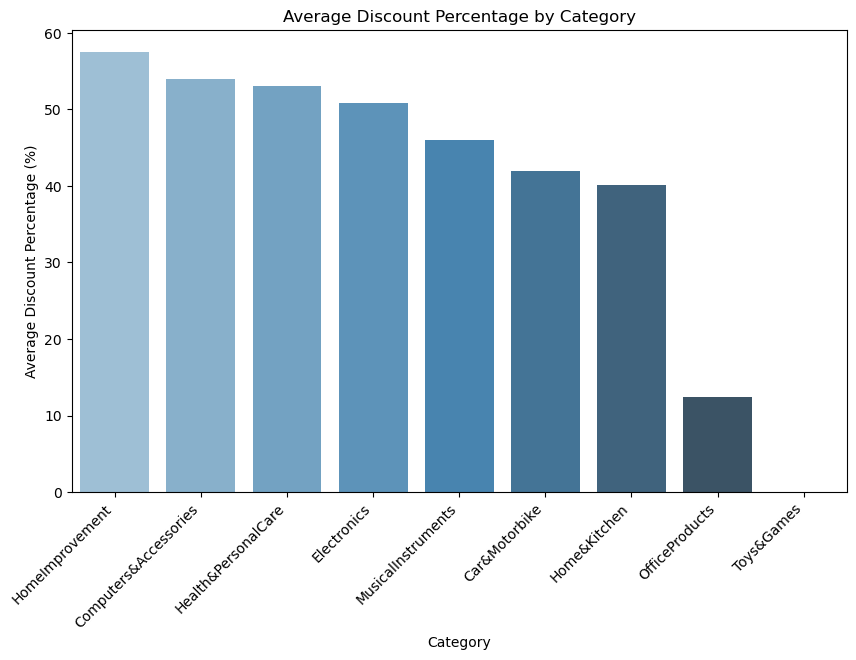

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_discount_percentage.index, y=avg_discount_percentage.values, palette="Blues_d")
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Discount Percentage (%)')
plt.title('Average Discount Percentage by Category')

plt.show()

--------------
5. What are the most popular product names?

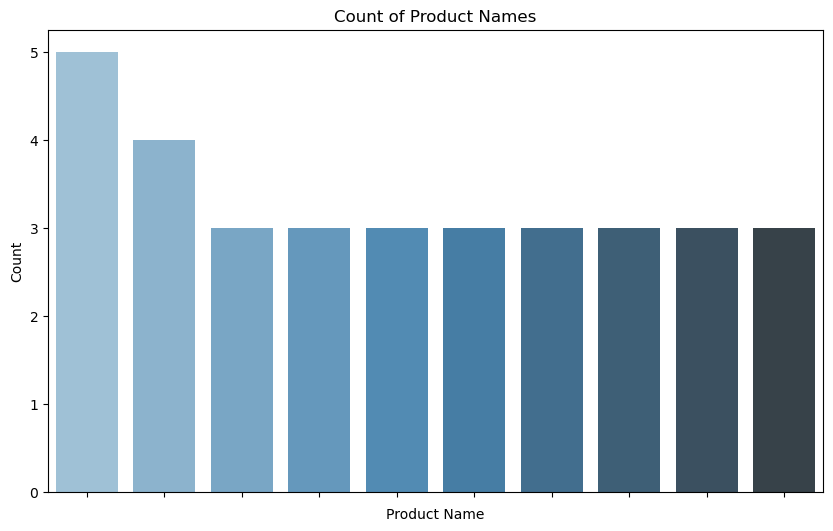

Count of Product Names
                                                                                                                                                                                   Product Name  Number of Products
                                                 Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                   5
                                                          Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                   4
                                    Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)                   3
             2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, C

In [18]:
popular_product_names_10 = df_amazon['Product Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x = popular_product_names_10.index, y = popular_product_names_10.values,  palette="Blues_d")
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Count of Product Names')
plt.xticks(range(len(popular_product_names_10)), '')
plt.show()

popular_product = pd.DataFrame({'Product Name': popular_product_names_10.index, 'Number of Products': popular_product_names_10.values})
print('Count of Product Names')
print(popular_product.to_string(index=False))

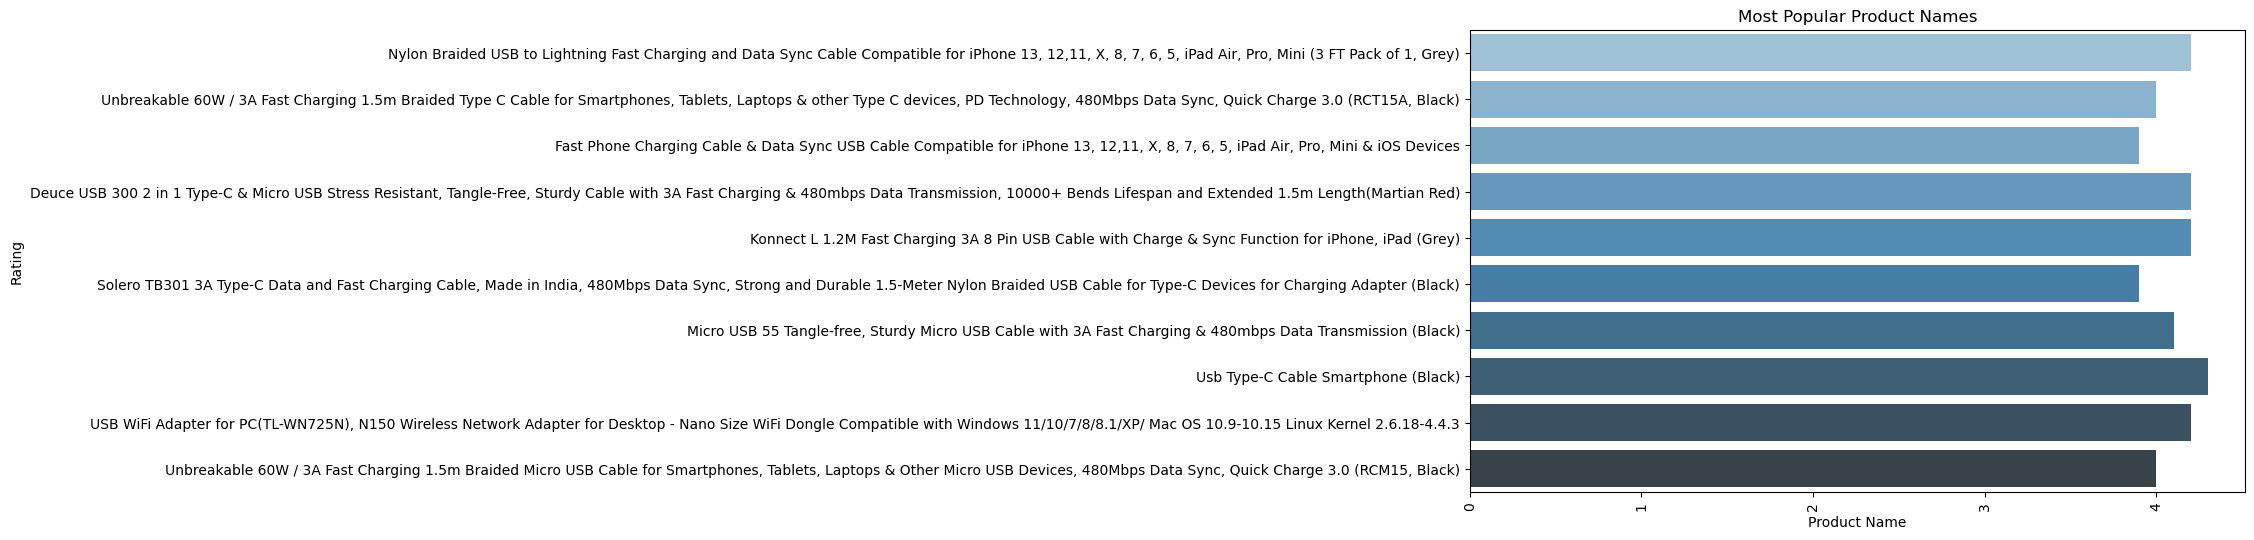

In [19]:
plt.figure(figsize=(10, 6))
popular_product_names_10 = df_amazon['Product Name'].value_counts().head(10)
sns.barplot(x = 'rating', y = 'Product Name', data = df_amazon.head(10), palette="Blues_d")
plt.xlabel("Product Name")
plt.ylabel("Rating")
plt.title("Most Popular Product Names")
plt.xticks(rotation=90)
plt.show()

-----------
6. What are the most popular product keywords?

In [20]:
df_amazon['Product Name'] = df_amazon['Product Name'].apply(lambda x: re.sub(r'\([^)]*\)|\| | /| \+| -', '', x))

In [21]:
nlp = spacy.load('en_core_web_sm')
df_amazon['text'] = df_amazon['about_product'].astype(str) + ' ' + df_amazon['Product Name'].astype(str)
def extract_product_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "PRODUCT"]
df_amazon['product_entities'] = df_amazon['text'].apply(extract_product_entities)
all_product_entities = [entity for entities in df_amazon['product_entities'] for entity in entities]
product_entity_freq = Counter(all_product_entities)
most_common_product_entities = product_entity_freq.most_common(25)
most_common_product_entities = pd.DataFrame(most_common_product_entities, columns=['Product Name', 'Count'])

<Axes: xlabel='Count', ylabel='Product Name'>

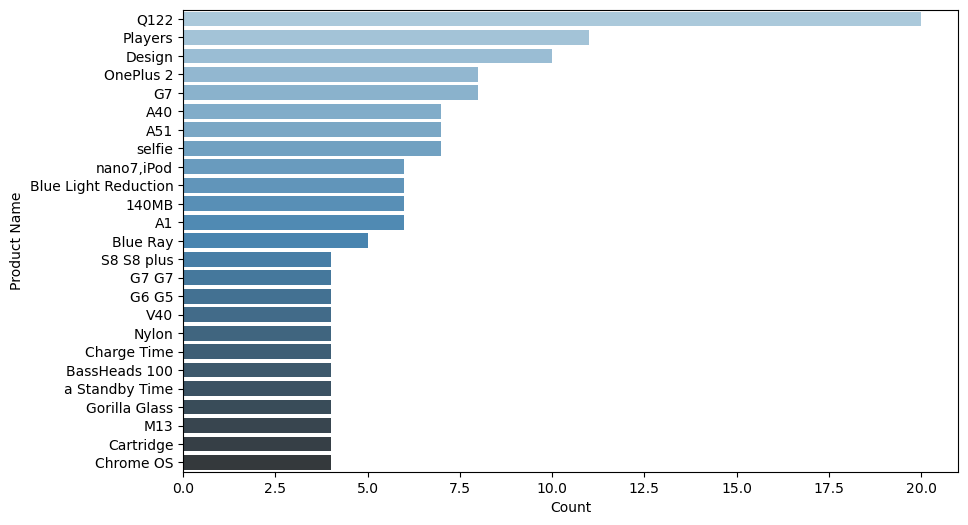

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Product Name', data=most_common_product_entities, palette="Blues_d")

----------
7. What are the most popular product reviews?

In [23]:
popular_product_reviews = df_amazon[["Product Name", "review_title", "review_content"]]

In [24]:
from transformers import pipeline, AutoTokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_analyzer = pipeline("sentiment-analysis", model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
def get_sentiment(text):
    tokens = tokenizer.encode(text, max_length=512, truncation=True)
    truncated_text = tokenizer.decode(tokens, skip_special_tokens=True)
    result = sentiment_analyzer(truncated_text)
    return result[0]['label'], result[0]['score']

columns = ['review_content', 'review_title']
popular_product_reviews['text'] = popular_product_reviews[columns].apply(lambda x: ' '.join(x), axis=1)
popular_product_reviews['sentiment'] = popular_product_reviews['text'].apply(get_sentiment)
popular_product_reviews['confidence'] = popular_product_reviews['sentiment'].apply(lambda x: x[1])

c:\Users\RS\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\RS\AppData\Local\Temp\ipykernel_2676\1285122035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_product_reviews['text'] = popular_product_reviews[columns].apply(lambda x: ' '.join(x), axis=1)
C:\Users\RS\AppData\Local\Temp\ipykernel_2676\1285122035.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [25]:
popular_product_reviews = pd.DataFrame(popular_product_reviews)
popular_product_reviews_top20 = popular_product_reviews.head(10).sort_values(by='confidence', ascending=False)

Text(0, 0.5, 'Product Name')

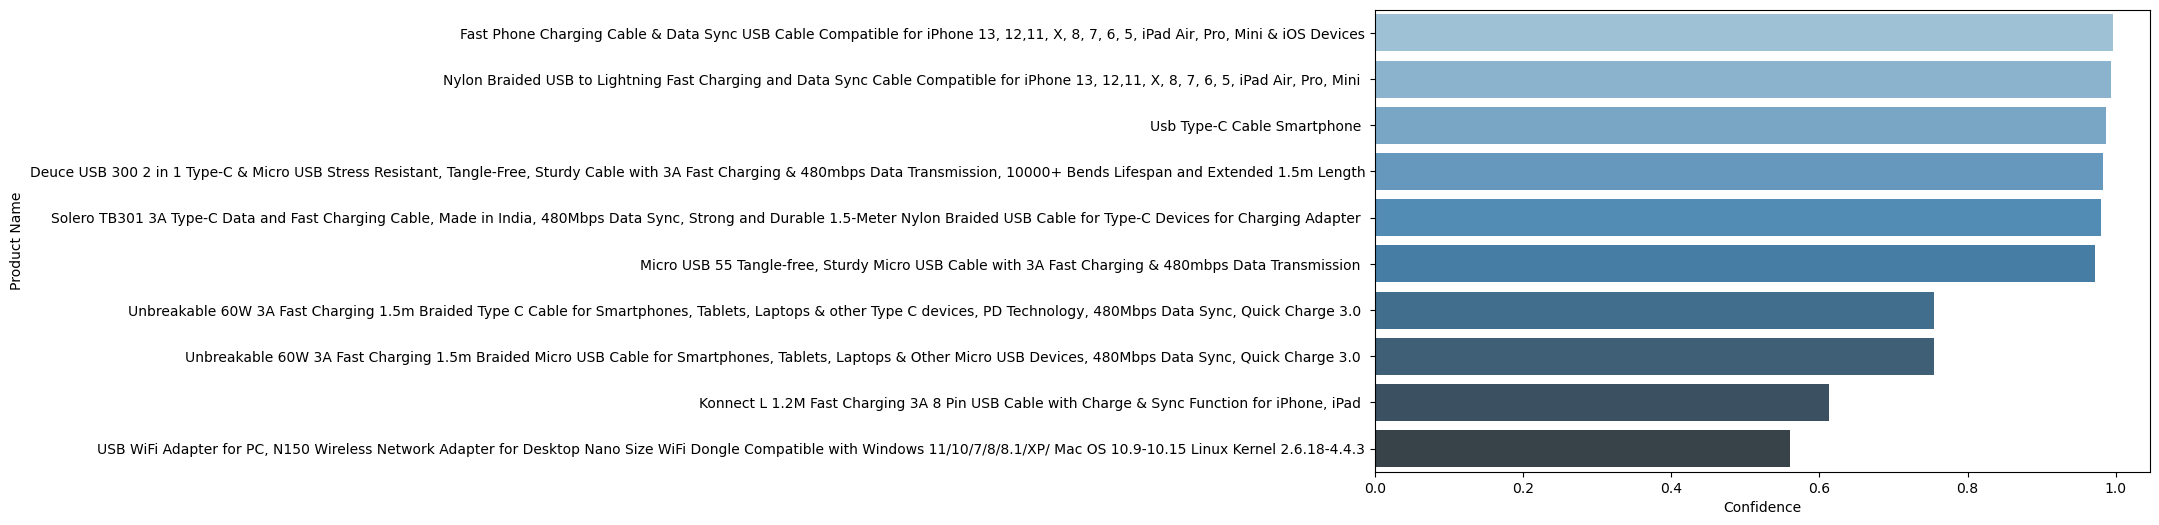

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='confidence', y='Product Name', data=popular_product_reviews_top20, palette="Blues_d")
plt.xlabel('Confidence')
plt.ylabel('Product Name')

----------
8. What is the correlation between discounted_price and rating?

In [27]:
corr_df = df_amazon[['discounted_price','rating']].replace('[^\d.]', '', regex=True).astype(float)
correlation = corr_df['discounted_price'].corr(corr_df['rating'])

In [28]:
print(f"The correlation between discounted price and rating is: {correlation}")

The correlation between discounted price and rating is: 0.12033741712288538


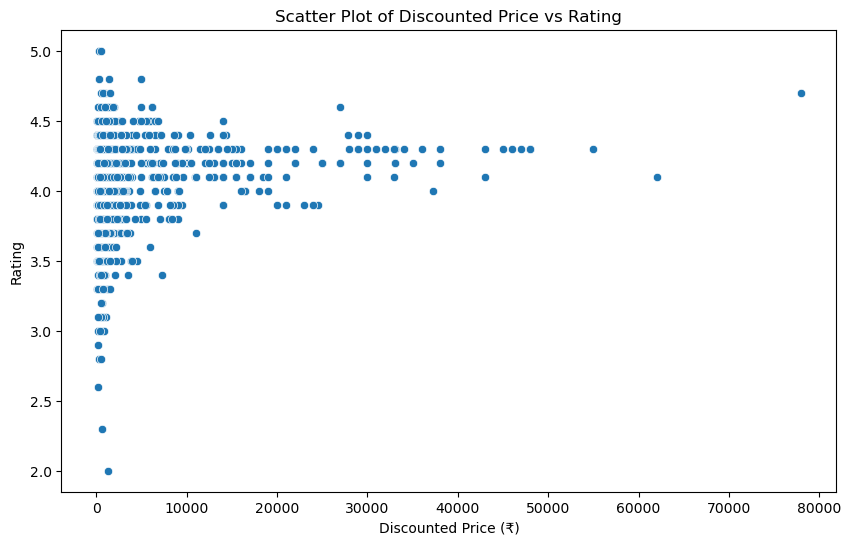

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=corr_df)
plt.title('Scatter Plot of Discounted Price vs Rating')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.show()

------------
9. What are the Top 5 categories based on the highest ratings?

In [30]:
top_categories = df_amazon.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index()

In [31]:
top_categories

,category,rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.154967
4,Electronics,4.081749
5,Home&Kitchen,4.040716
6,Health&PersonalCare,4.000000
7,MusicalInstruments,3.900000
8,Car&Motorbike,3.800000


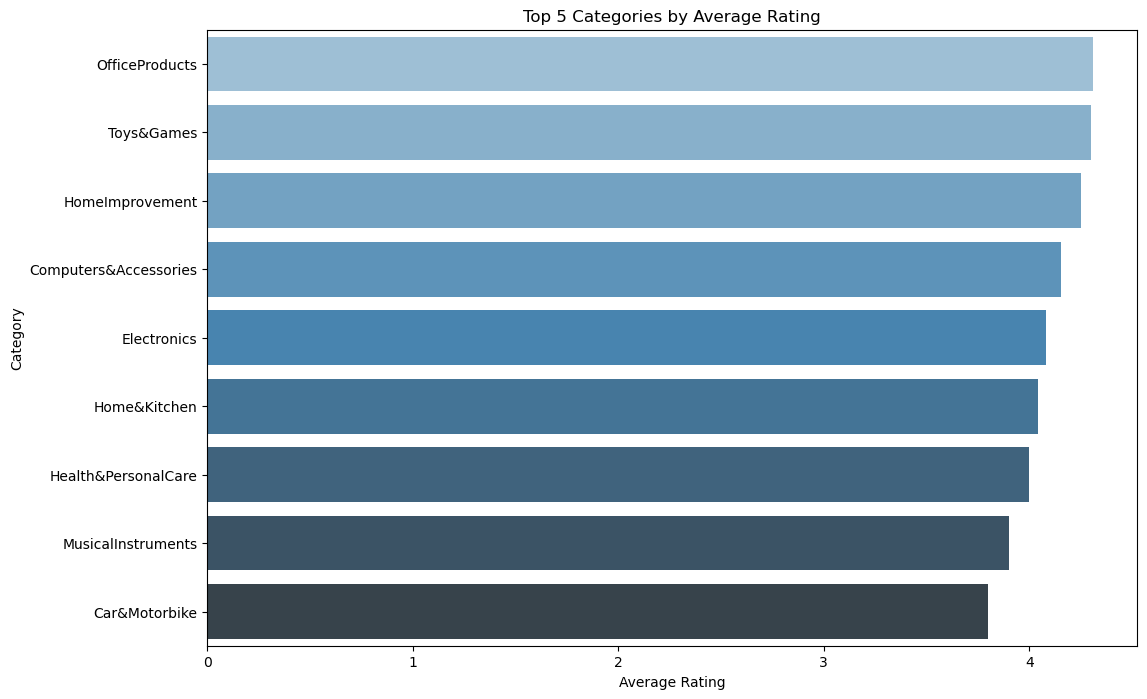

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='category', data=top_categories, palette='Blues_d')
plt.title('Top 5 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

-------
10. Identify any potential areas for improvement or optimization based on the data analysis.

+ Consider improving product quality, addressing common complaints, or enhancing customer service.

+ The correlation between discounted price and rating is weak (0.12), suggesting price isn't affecting ratings.

+ Identify categories with the highest average ratings and apply successful strategies from high-rated categories to those with lower ratings.

+ Visualize the rating distribution across different categories to spot trends or outliers. Focus on standardizing quality across all products within these categories.

-----------
1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.
 Handle missing values and remove duplicate rows if necessary.


In [33]:
df_spotify = pd.read_csv("spotify.csv")

In [34]:
df_spotify.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [35]:
df_spotify.duplicated().sum()

27

In [36]:
df_spotify.drop_duplicates(inplace=True)

-----------
2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

c:\Users\RS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Popularity', ylabel='Count'>

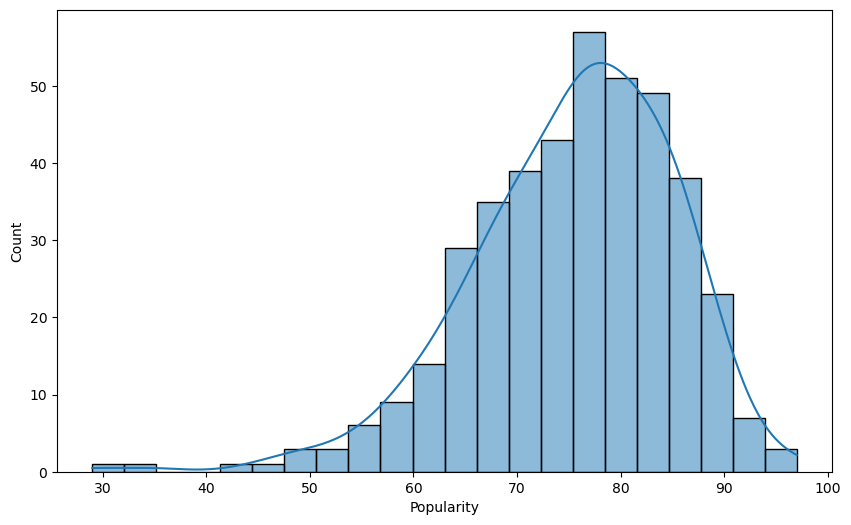

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Popularity', data=df_spotify, kde=True)

------
3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [38]:
df_popularity_duration = df_spotify[['Popularity', 'Duration (ms)']]

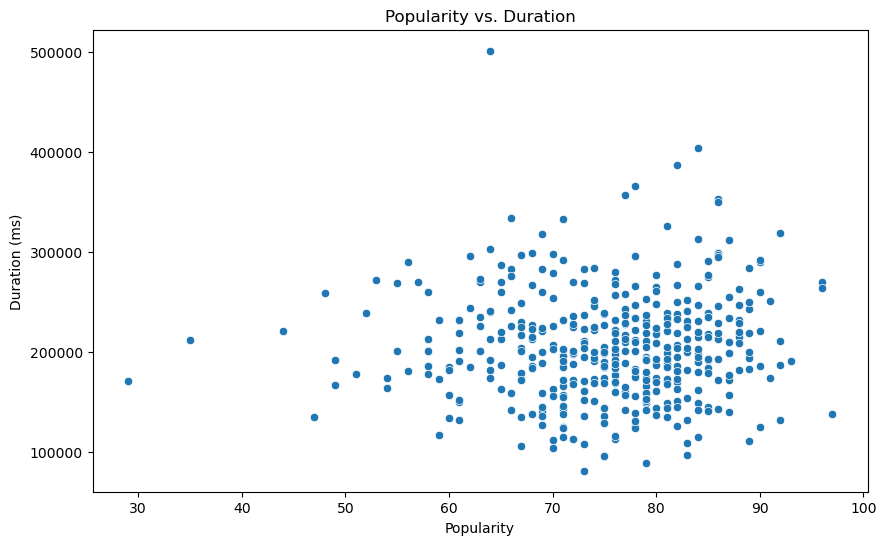

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Duration (ms)', data=df_popularity_duration)
plt.title('Popularity vs. Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

-------------
4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
using a countplot.

In [40]:
tracks = df_spotify[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity', ascending=False).head(10)

<Axes: xlabel='Artist', ylabel='count'>

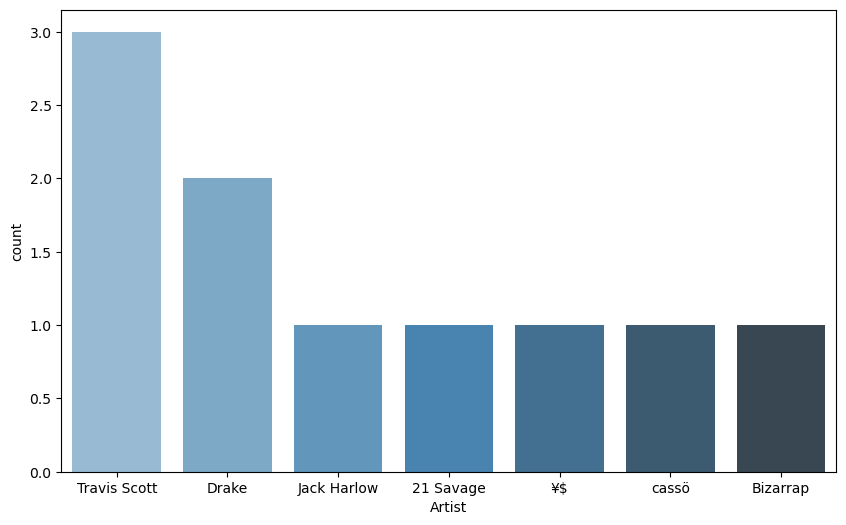

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Artist', data=tracks, order=tracks['Artist'].value_counts().iloc[:10].index, palette="Blues_d")

--------
5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [42]:
df_least_popular = df_spotify.sort_values(by='Popularity', ascending=True).head(5)

<Axes: xlabel='Artist', ylabel='Popularity'>

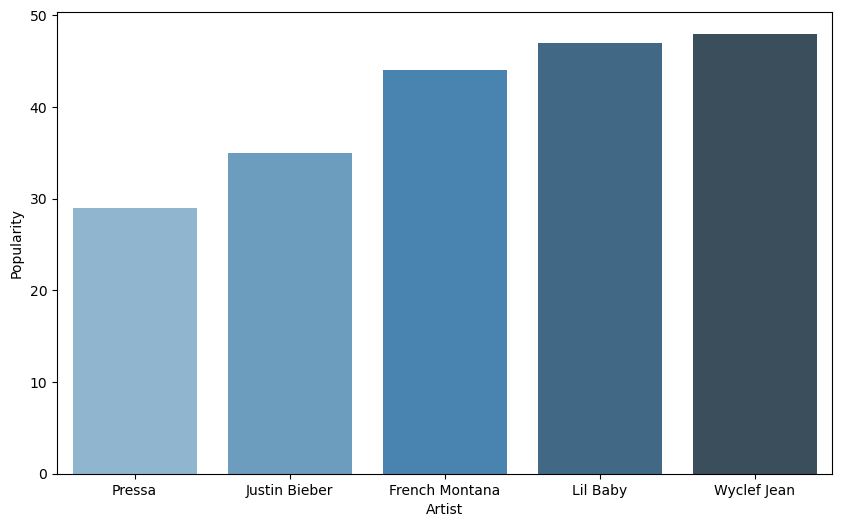

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Artist', y='Popularity', data=df_least_popular, palette="Blues_d")

------
6.Among the top 5 most popular artists, which artist has the highest popularity on average?
 Calculate and display the average popularity for each artist.

In [44]:
top_artists = df_spotify.groupby('Artist')['Popularity'].mean()

In [45]:
print("Average Popularity for Each Artist: \n", top_artists)

Average Popularity for Each Artist: 
 Artist
*NSYNC                    67.00
2 Chainz                  72.00
21 Savage                 83.80
A Boogie Wit da Hoodie    80.00
A$AP Ferg                 69.00
                          ...  
Young Nudy                67.00
Young Thug                73.75
benny blanco              72.00
cassö                     92.00
¥$                        85.10
Name: Popularity, Length: 115, dtype: float64


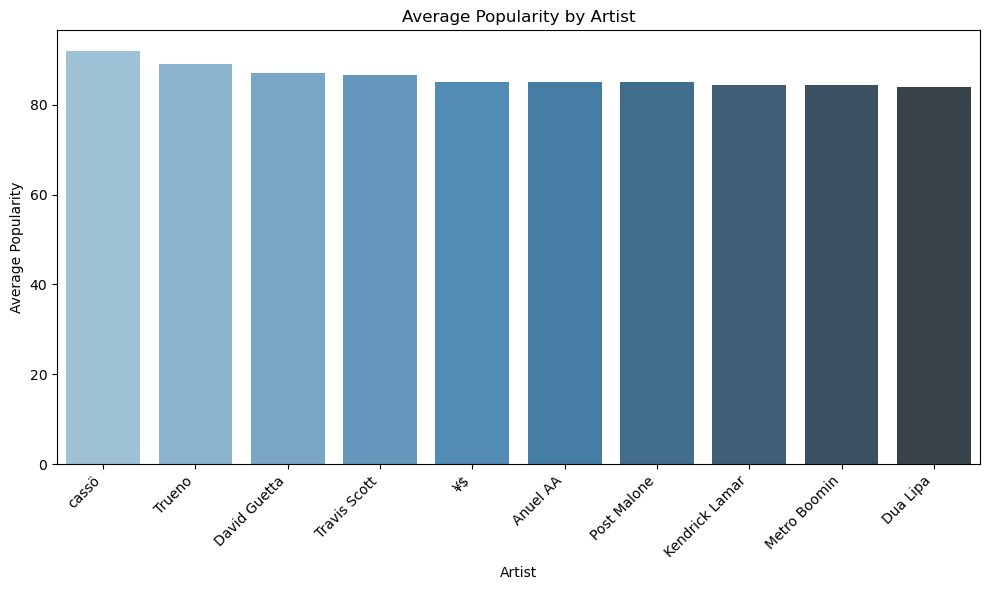

In [46]:
top_artists_10 = top_artists.nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_10.index, y=top_artists_10.values, palette="Blues_d")
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Artist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [47]:
top_5_artists = top_artists.nlargest(5)
avg_popularity_artists = top_5_artists.idxmax()
print(f"The artist with the highest popularity is: {avg_popularity_artists}")

The artist with the highest popularity is: cassö


In [48]:
avg_popularity = top_5_artists.max()

print(f"The average popularity of the top 5 artists is: {avg_popularity}")

The average popularity of the top 5 artists is: 92.0


-----
7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [49]:
top_5_popular = df_spotify.groupby('Artist')['Popularity'].mean().nlargest(5)
tracks_top_5_popular = df_spotify[df_spotify['Artist'].isin(top_5_popular.index)]

In [50]:
most_popular_tracks = tracks_top_5_popular.loc[tracks_top_5_popular.groupby('Artist')['Popularity'].idxmax(), ['Artist', 'Track Name']].reset_index(drop=True)

In [51]:
most_popular_tracks

,Artist,Track Name
0,David Guetta,Baby Don't Hurt Me
1,Travis Scott,FE!N (feat. Playboi Carti)
2,Trueno,Mamichula - con Nicki Nicole
3,cassö,Prada
4,¥$,CARNIVAL


-------
8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

c:\Users\RS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x1000 with 0 Axes>

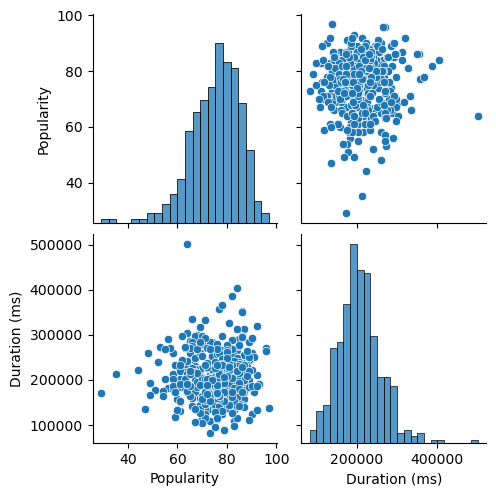

In [52]:
plt.figure(figsize=(12, 10))
sns.pairplot(df_spotify[['Popularity', 'Duration (ms)', 'Track ID', 'Artist', 'Track Name']])

------
9.Does the duration of tracks vary significantly across different artists?
Explore this visually using a box plot or violin plot.

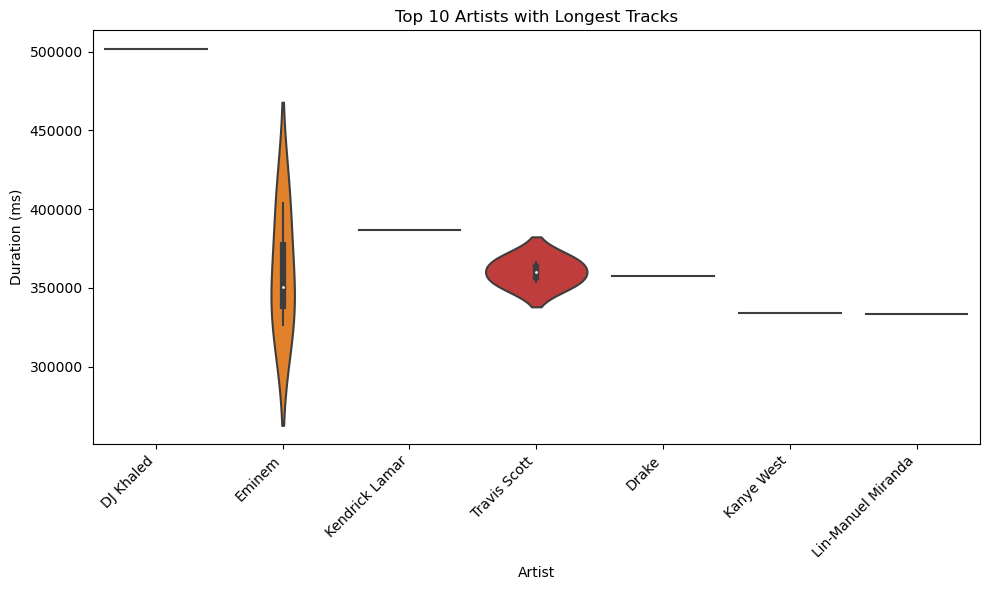

In [53]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=df_spotify.nlargest(10, 'Duration (ms)'))
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Top 10 Artists with Longest Tracks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

----
10.How does the distribution of track popularity vary for different artists?
Visualize this using a swarm plot or a violin plot.

c:\Users\RS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


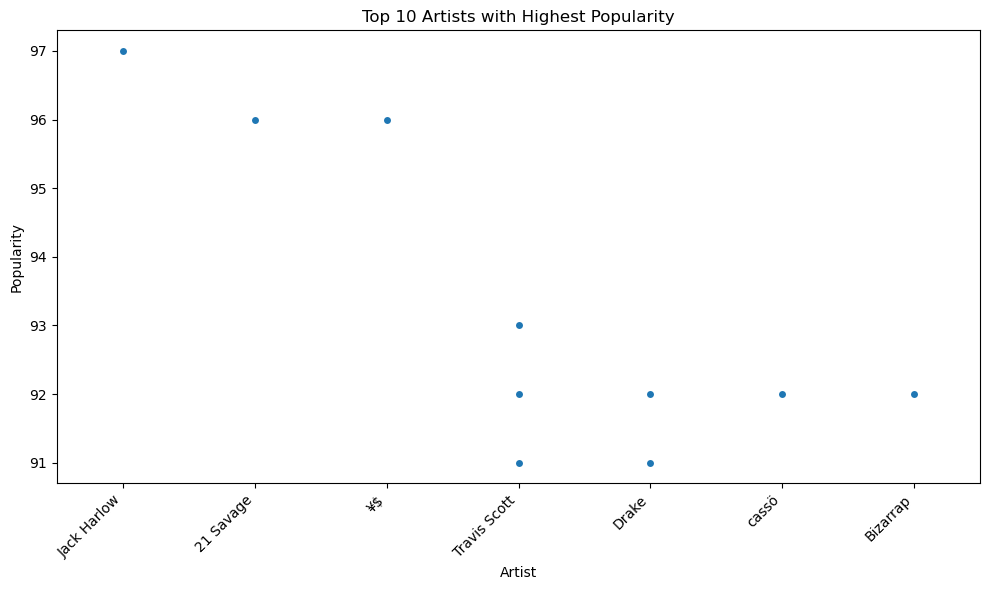

In [54]:
plt.figure(figsize = (10, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df_spotify.nlargest(10, 'Popularity'))
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Top 10 Artists with Highest Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()